# Overlap between the zones categories and the primary fishng grounds + calculations biomass of krill cought in each category


In [2]:
# import libraries (ok sous base anaconda)
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import seaborn as sns

Cannot find header.dxf (GDAL_DATA is not defined)


In [3]:
# To be change with local directory of the data (file too heavy to be on git)
import os
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/output_results/')

## Load datasets

In [4]:
zones_krill_carbon = pd.read_csv('zones_krill_carbon.csv').set_index(['latitude', 'longitude']) 
array_krill_carbon = xr.open_dataset('zones_krill_carbon.nc').to_array()

# load the files with the "high fishing grounds cells"
H_catch = pd.read_csv('H_catch.csv').set_index(['latitude', 'longitude']) 

H_catch_p1 = pd.read_csv('H_catch_p1.csv').set_index(['latitude', 'longitude']) 

H_catch_p2 = pd.read_csv('H_catch_p2.csv').set_index(['latitude', 'longitude']) 

H_catch_p3 = pd.read_csv('H_catch_p3.csv').set_index(['latitude', 'longitude']) 

In [5]:
#Add the zones categories data (and keep only this variable to plot)
zones_krill_carbon_Hcatch = H_catch.join(zones_krill_carbon).dropna().drop(["High_fishing_ground","label_grid", "mean_seq_time", "krill_adult_log", "krill_catch_density_log"], axis=1)

zones_krill_carbon_Hcatch_p1 = H_catch_p1.join(zones_krill_carbon).dropna().drop(["High_fishing_ground","label_grid", "mean_seq_time", "krill_adult_log", "krill_catch_density_log"], axis=1)
zones_krill_carbon_Hcatch_p2 = H_catch_p2.join(zones_krill_carbon).dropna().drop(["High_fishing_ground","label_grid", "mean_seq_time", "krill_adult_log", "krill_catch_density_log"], axis=1)
zones_krill_carbon_Hcatch_p3 = H_catch_p3.join(zones_krill_carbon).dropna().drop(["High_fishing_ground","label_grid", "mean_seq_time", "krill_adult_log", "krill_catch_density_log"], axis=1)

In [6]:
COCA = zones_krill_carbon_Hcatch[(zones_krill_carbon_Hcatch['label'] == 1) | (zones_krill_carbon_Hcatch['label'] == 3)]

COCA_p1 = zones_krill_carbon_Hcatch_p1[(zones_krill_carbon_Hcatch_p1['label'] == 1) | (zones_krill_carbon_Hcatch_p1['label'] == 3)]
COCA_p2 = zones_krill_carbon_Hcatch_p2[(zones_krill_carbon_Hcatch_p2['label'] == 1) | (zones_krill_carbon_Hcatch_p2['label'] == 3)]
COCA_p3 = zones_krill_carbon_Hcatch_p3[(zones_krill_carbon_Hcatch_p3['label'] == 1) | (zones_krill_carbon_Hcatch_p3['label'] == 3)]

## Save the COCA files

In [7]:
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/output_results/')
# Save the dataframe
COCA.to_csv('COCA.csv')
COCA_p1.to_csv('COCA_p1.csv')
COCA_p2.to_csv('COCA_p2.csv')
COCA_p3.to_csv('COCA_p3.csv')

In [8]:
# make a regular grid to plot
coords = pd.DataFrame({'latitude':np.repeat(np.arange(-69, -51, 2), 101),
                       'longitude': np.tile(np.arange(-53, 149, 2), 9),
                       'label_grid': np.zeros(909)}).set_index(['latitude', 'longitude'])

coords = coords.sort_values(['latitude', 'longitude'])

In [9]:
zones_krill_carbon_Hcatch = coords.join(zones_krill_carbon_Hcatch, how='left')
zones_krill_carbon_Hcatch = zones_krill_carbon_Hcatch.drop(['label_grid'], axis =1)

zones_krill_carbon_Hcatch_p1 = coords.join(zones_krill_carbon_Hcatch_p1, how='left')
zones_krill_carbon_Hcatch_p1 = zones_krill_carbon_Hcatch_p1.drop(['label_grid'], axis =1)

zones_krill_carbon_Hcatch_p2 = coords.join(zones_krill_carbon_Hcatch_p2, how='left')
zones_krill_carbon_Hcatch_p2 = zones_krill_carbon_Hcatch_p2.drop(['label_grid'], axis =1)

zones_krill_carbon_Hcatch_p3 = coords.join(zones_krill_carbon_Hcatch_p3, how='left')
zones_krill_carbon_Hcatch_p3 = zones_krill_carbon_Hcatch_p3.drop(['label_grid'], axis =1)

In [10]:
# transform in xarray
array_zones_krill_carbon_Hcatch = xr.Dataset.from_dataframe(zones_krill_carbon_Hcatch) # convert into xarrayDataset
array_zones_krill_carbon_Hcatch = xr.Dataset.to_array(array_zones_krill_carbon_Hcatch)

array_zones_krill_carbon_Hcatch_p1 = xr.Dataset.from_dataframe(zones_krill_carbon_Hcatch_p1) # convert into xarrayDataset
array_zones_krill_carbon_Hcatch_p1 = xr.Dataset.to_array(array_zones_krill_carbon_Hcatch_p1)

array_zones_krill_carbon_Hcatch_p2 = xr.Dataset.from_dataframe(zones_krill_carbon_Hcatch_p2) # convert into xarrayDataset
array_zones_krill_carbon_Hcatch_p2 = xr.Dataset.to_array(array_zones_krill_carbon_Hcatch_p2)

array_zones_krill_carbon_Hcatch_p3 = xr.Dataset.from_dataframe(zones_krill_carbon_Hcatch_p3) # convert into xarrayDataset
array_zones_krill_carbon_Hcatch_p3 = xr.Dataset.to_array(array_zones_krill_carbon_Hcatch_p3)

## Overlap plot between the KAKS and other categories and the primary fishing grounds
- for the whole period : 1988 - 2023
- for each period (1,2,3)

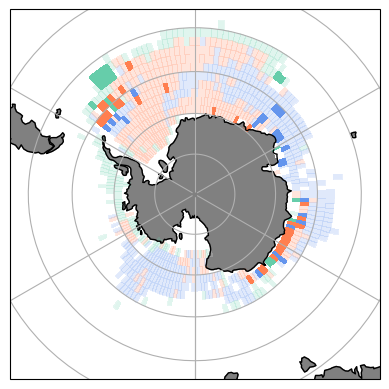

In [11]:
# Map all years - threshold

map_proj = ccrs.SouthPolarStereo()

p = array_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}, # the plot's projection
    levels=[1, 2, 3, 4], 
    colors =  ['white', 'cornflowerblue', 'mediumaquamarine', 'coral'],
    alpha = 0.2
) 

p2 = array_zones_krill_carbon_Hcatch.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    #color ='orange', # check the grid
    levels=[1, 2, 3, 4],
    colors = ['white', 'cornflowerblue', 'mediumaquamarine', 'coral'], # 'black' ,#orangered', 
)

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'overlap', shrink = 0.8)
#plt.legend()
#plt.title('Spatial overlap of the upper 1/3 quantile of the krill abundance, \n the time of carbon sequestration and the 2/3 upper \n quantile of the number of krill catch')
plt.title('')

#os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/figures/')
#plt.savefig('p_overlap_krill_carbon_fishing_p3.png')

plt.show(p2)

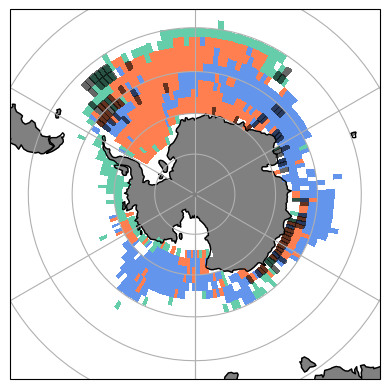

In [12]:
map_proj = ccrs.SouthPolarStereo()

p = array_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}, # the plot's projection
    levels=[1, 2, 3, 4], 
    colors =  ['white', 'cornflowerblue', 'mediumaquamarine', 'coral'],
    alpha = 1
) 

p2 = array_zones_krill_carbon_Hcatch.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    #color ='orange', # check the grid
    levels=[1, 2, 3, 4],
    colors = 'black', #['white', 'cornflowerblue', 'mediumaquamarine', 'coral'], #  ,#orangered', 
    alpha = 0.6
)

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'overlap', shrink = 0.8)
#plt.legend()
#plt.title('Spatial overlap of the upper 1/3 quantile of the krill abundance, \n the time of carbon sequestration and the 2/3 upper \n quantile of the number of krill catch')
plt.title('')

#os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/figures/')
#plt.savefig('p_overlap_krill_carbon_Hfishing_allyears.png')

plt.show(p2)

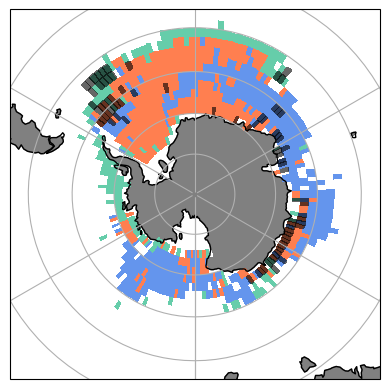

In [14]:
map_proj = ccrs.SouthPolarStereo()

p = array_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}, # the plot's projection
    levels=[1, 2, 3, 4], 
    colors =  ['white', 'cornflowerblue', 'mediumaquamarine', 'coral'],
    alpha = 1
) 
p2 = array_zones_krill_carbon_Hcatch_p1.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[1, 2],
    colors =  'black' ,#orangered', 
    alpha = 0.6,
    hatch = {'x'}

)

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'overlap', shrink = 0.8)
#plt.legend()
#plt.title('Spatial overlap of the upper 1/3 quantile of the krill abundance, \n the time of carbon sequestration and the 2/3 upper \n quantile of the number of krill catch')
plt.title('')

#os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/figures/')
#plt.savefig('p_overlap_krill_carbon_Hfishing_p1.png')

plt.show(p2)

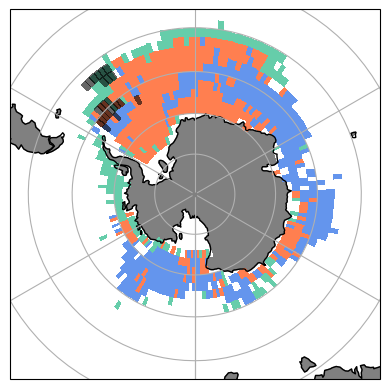

In [15]:
map_proj = ccrs.SouthPolarStereo()

p = array_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}, # the plot's projection
    levels=[1, 2, 3, 4], 
    colors =  ['white', 'cornflowerblue', 'mediumaquamarine', 'coral'] #['mediumaquamarine', 'cornflowerblue', 'coral'] 
) 
p2 = array_zones_krill_carbon_Hcatch_p2.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[1, 2],
    colors =  'black' ,#orangered', 
    alpha = 0.6,
    hatch = {'x'}

)


p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'overlap', shrink = 0.8)
#plt.legend()
#plt.title('Spatial overlap of the upper 1/3 quantile of the krill abundance, \n the time of carbon sequestration and the 2/3 upper \n quantile of the number of krill catch')
plt.title('')

#os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/figures/')
#plt.savefig('p_overlap_krill_carbon_Hfishing_p2.png')

plt.show(p2)

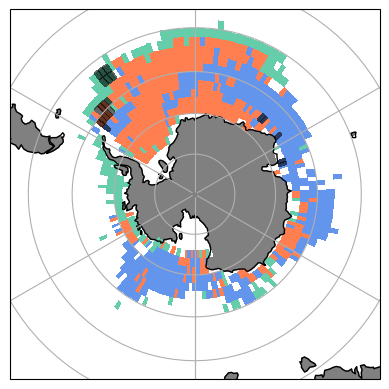

In [16]:
# Map period 3 - threshold

map_proj = ccrs.SouthPolarStereo()

p = array_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}, # the plot's projection
    levels=[1, 2, 3, 4], 
    colors =  ['white', 'cornflowerblue', 'mediumaquamarine', 'coral'], #['mediumaquamarine', 'cornflowerblue', 'coral'] 
    alpha = 1
) 

p2 = array_zones_krill_carbon_Hcatch_p3.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[1, 2],
    colors =  'black' ,#orangered', 
    alpha = 0.6,
    hatch = {'x'}

)


p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'overlap', shrink = 0.8)
#plt.legend()
#plt.title('Spatial overlap of the upper 1/3 quantile of the krill abundance, \n the time of carbon sequestration and the 2/3 upper \n quantile of the number of krill catch')
plt.title('')

#os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/figures/')
#plt.savefig('p_overlap_krill_carbon_Hfishing_p3.png')

plt.show(p2)

# From the point of view of fishing: how much krill were caught in KAKS and other categories

In [107]:
# load csv to use the krill green wieght (summed in each cell over the years)
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/outputs_formated_data/')

# load the catch data (not the overlapp) as dataframes (the .nc were already loaded previously)
catch_all_years = pd.read_csv('Krill_catch_final.csv').dropna().set_index(['latitude', 'longitude']) 
period1 = pd.read_csv('Krill_catch_final_1.csv').dropna().set_index(['latitude', 'longitude']) 
period2 = pd.read_csv('Krill_catch_final_2.csv').dropna().set_index(['latitude', 'longitude']) 
period3 = pd.read_csv('Krill_catch_final_3.csv').dropna().set_index(['latitude', 'longitude']) 

In [108]:
catch_all_years

krill_greenweight_kg  krill_catch_density  \
latitude longitude                                              
-69       5                 1.600000e+03         2.535622e+01   
          7                 2.640000e-01         4.183777e-03   
          9                 1.580000e-01         2.503927e-03   
          13                3.620000e+04         5.736845e+02   
          29                1.050000e+05         1.664002e+03   
...                                  ...                  ...   
-53      -35                4.502177e+08         4.248823e+06   
         -7                 2.000000e+03         1.887453e+01   
          35                4.000000e+02         3.774905e+00   
          37                1.192300e+06         1.125205e+04   
-51      -37                7.274900e+04         6.565472e+02   

                    krill_greenweight_kg_log  krill_catch_density_log  
latitude longitude                                                     
-69       5                         3.204391                 1.420883  
          7                         0.101747                 0.001813  
          9                         0.063709                 0.001086  
          13                        4.558721                 2.759430  
          29                        5.021193                 3.221415  
...                                      ...                      ...  
-53      -35                        8.653423                 6.628269  
         -7                         3.301247                 1.298297  
          35                        2.603144                 0.678965  
          37                        6.076386                 4.051270  
-51      -37                        4.861833                 2.817927  

[227 rows x 4 columns]

In [109]:
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/output_results/')

# load the krill and carbon zones files as dataframe (previously loaded as .nc)
krill_carbon_df = pd.read_csv('zones_krill_carbon.csv')
krill_carbon_df.set_index(['latitude', 'longitude'], inplace = True) 
krill_carbon_df.dropna() # 2700 rows or 1644 without Nan

label_grid  mean_seq_time  krill_adult_log  \
latitude longitude                                               
-75      -179              0.0     646.910548          0.92934   
         -177              0.0     601.882341          1.70806   
         -175              0.0     655.238074          1.24843   
         -173              0.0     641.075711          1.46391   
         -171              0.0     620.753036          1.66276   
...                        ...            ...              ...   
-47       63               0.0     330.669272          0.00965   
          65               0.0     298.907285          0.38558   
          67               0.0      45.645605          0.29983   
          69               0.0      44.367955          0.35615   
          71               0.0      88.203798          0.01810   

                    krill_catch_density_log  label  
latitude longitude                                  
-75      -179                           0.0    1.0  
         -177                           0.0    3.0  
         -175                           0.0    1.0  
         -173                           0.0    1.0  
         -171                           0.0    3.0  
...                                     ...    ...  
-47       63                            0.0    0.0  
          65                            0.0    0.0  
          67                            0.0    0.0  
          69                            0.0    0.0  
          71                            0.0    0.0  

[1644 rows x 5 columns]

In [110]:
HKS = krill_carbon_df.loc[krill_carbon_df['label'] == 3]
HKS # 383 rows
HS = krill_carbon_df.loc[krill_carbon_df['label'] == 1]
HS # 410
HK = krill_carbon_df.loc[krill_carbon_df['label'] == 2]
HK #167
LKS = krill_carbon_df.loc[krill_carbon_df['label'] == 0]
LKS # 684

label_grid  mean_seq_time  krill_adult_log  \
latitude longitude                                               
-75      -169              0.0     413.121447          1.49866   
         -167              0.0     423.256786          1.30462   
         -161              0.0     423.185506          1.45778   
         -155              0.0     417.939924          1.35194   
          165              0.0      -0.000000          1.36420   
...                        ...            ...              ...   
-47       63               0.0     330.669272          0.00965   
          65               0.0     298.907285          0.38558   
          67               0.0      45.645605          0.29983   
          69               0.0      44.367955          0.35615   
          71               0.0      88.203798          0.01810   

                    krill_catch_density_log  label  
latitude longitude                                  
-75      -169                           0.0    0.0  
         -167                           0.0    0.0  
         -161                           0.0    0.0  
         -155                           0.0    0.0  
          165                           0.0    0.0  
...                                     ...    ...  
-47       63                            0.0    0.0  
          65                            0.0    0.0  
          67                            0.0    0.0  
          69                            0.0    0.0  
          71                            0.0    0.0  

[684 rows x 5 columns]

#### Calculate the amount of krill caught in each type of zone (HKS, HK and HS)
On the whole period but we can do the same with each period

- First calculate the total amount of catch to calculate the proportion (sum on the file of catch on the whole period)
- Join the HKS/HK/HS dataframe with the catch data (on the whole period here) to have the true catch values (not log)
- Then sum the catch to have the whole amount on each zone

In [111]:
# sum of all catch since 1988
tot_catch = catch_all_years.sum()
tot_catch # ['krill_greenweight_kg'] = 7 672 510 450 Kg = 7.6 10+9 Kg

krill_greenweight_kg        7.672510e+09
krill_catch_density         1.086447e+08
krill_greenweight_kg_log    9.441659e+02
krill_catch_density_log     5.738522e+02
dtype: float64

In [113]:
# Join the KAKS with the catch data
overlap_HKS_all_years = HKS.join(catch_all_years, how = 'left', lsuffix='_hks', rsuffix='_catch')
overlap_HKS_all_years = overlap_HKS_all_years.drop(['label_grid', 'mean_seq_time', 'krill_adult_log', 'krill_catch_density_log_hks', 'label', 'krill_greenweight_kg_log', 'krill_catch_density_log_catch'], axis =1) # 72 rows
overlap_HKS_all_years.sum() # amount of krill caught in the KBCA since 1988 = 2.273387e+09 Kg

krill_greenweight_kg    2.273387e+09
krill_catch_density     2.653273e+07
dtype: float64

In [116]:
# Join the HS with the catch data
overlap_HS_all_years = HS.join(catch_all_years, how = 'left', lsuffix='_hks', rsuffix='_catch')
overlap_HS_all_years = overlap_HS_all_years.drop(['label_grid', 'mean_seq_time', 'krill_adult_log', 'krill_catch_density_log_hks', 'label', 'krill_greenweight_kg_log', 'krill_catch_density_log_catch'], axis =1) # 14 rows
overlap_HS_all_years.sum() # 1.031345e+08 Kg

krill_greenweight_kg    1.031345e+08
krill_catch_density     1.218856e+06
dtype: float64

In [117]:
### Join the HK with the catch data
overlap_HK_all_years = HK.join(catch_all_years, how = 'left', lsuffix='_hks', rsuffix='_catch')
overlap_HK_all_years = overlap_HK_all_years.drop(['label_grid', 'mean_seq_time', 'krill_adult_log', 'krill_catch_density_log_hks', 'label', 'krill_greenweight_kg_log', 'krill_catch_density_log_catch'], axis =1) # 14 rows
overlap_HK_all_years.sum() #3.922799e+09 Kg

krill_greenweight_kg    3.922799e+09
krill_catch_density     4.346627e+07
dtype: float64

In [118]:
### Join the LKS with the catch data
overlap_LKS_all_years = LKS.join(catch_all_years, how = 'left', lsuffix='_hks', rsuffix='_catch')
overlap_LKS_all_years = overlap_LKS_all_years.drop(['label_grid', 'mean_seq_time', 'krill_adult_log', 'krill_catch_density_log_hks', 'label', 'krill_greenweight_kg_log', 'krill_catch_density_log_catch'], axis =1) # 14 rows
overlap_LKS_all_years.sum() # 6.251648e+08 Kg

krill_greenweight_kg    6.251648e+08
krill_catch_density     7.307422e+06
dtype: float64

In [119]:
# Calculte the proportion of krill catch in each area on the total amount of catch
prop_catch_HKS = overlap_HKS_all_years.sum()['krill_greenweight_kg']/tot_catch['krill_greenweight_kg'] # 0.296
prop_catch_HS = overlap_HS_all_years.sum()['krill_greenweight_kg']/tot_catch['krill_greenweight_kg'] # 0.013
prop_catch_HK = overlap_HK_all_years.sum()['krill_greenweight_kg']/tot_catch['krill_greenweight_kg'] # 0.511
prop_catch_LKS = overlap_LKS_all_years.sum()['krill_greenweight_kg']/tot_catch['krill_greenweight_kg'] # 0.08
prop_catch_COCA = (overlap_HKS_all_years.sum()['krill_greenweight_kg'] + overlap_HS_all_years.sum()['krill_greenweight_kg'])/tot_catch['krill_greenweight_kg'] # 0.3097
prop_catch_LKS

0.08148112311378873

### Results

- 0.296 of catch are taken in the KAKS
- 0.013 of ctach are taken in High seq time
- 0.51 of catch are taken from high krill (low-medium seq time)
- 0.08 of catch are taken for low-medium krill density a,d low-medium time seq

- 0.309 of catch are taken from COCA (important zones for C seq mediates by krill but primary fishing ground at the same time : so the potential conflicting areas)

## Caveats

We lose some cells for which we dont have the data for sequestrtaion time and/or krill biomass (to close from shore).
It appears that we put aside 10% of the catch overall, that are not part of the overlap analysis. 

In [124]:
prop_catch_LKS + prop_catch_HS + prop_catch_HK + prop_catch_HKS

0.902505799512114